In [7]:
import MDAnalysis as mda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the files
top = '/media/rutika/My_Book/hpc/arrow/h2a_3lz0/dry_h2a_3lz0.prmtop'
traj = '/media/rutika/My_Book/hpc/arrow/h2a_3lz0/dry_t_fit.xtc'
u = mda.Universe(top, traj)

#Residues 
residues_set1 = u.select_atoms("resid 291-333")
residues_set2 = u.select_atoms("resid 134-145")
cutoff_distance = 5.0  
all_contacts = []

for ts in u.trajectory:
   
    contacts = np.zeros((len(residues_set1.residues), len(residues_set2.residues)))
    
    for i, res1 in enumerate(residues_set1.residues):
        for j, res2 in enumerate(residues_set2.residues):
            distances = mda.lib.distances.distance_array(res1.atoms.positions, res2.atoms.positions)
            contacts[i, j] = np.sum(distances < cutoff_distance)
    
    all_contacts.append(contacts)

average_contacts = np.mean(all_contacts, axis=0)

contact_data = pd.DataFrame(average_contacts, 
                            index=[res1.resid for res1 in residues_set1.residues],
                            columns=[res2.resid for res2 in residues_set2.residues])

contact_data.to_csv("contact_wt_shl7_1.csv")


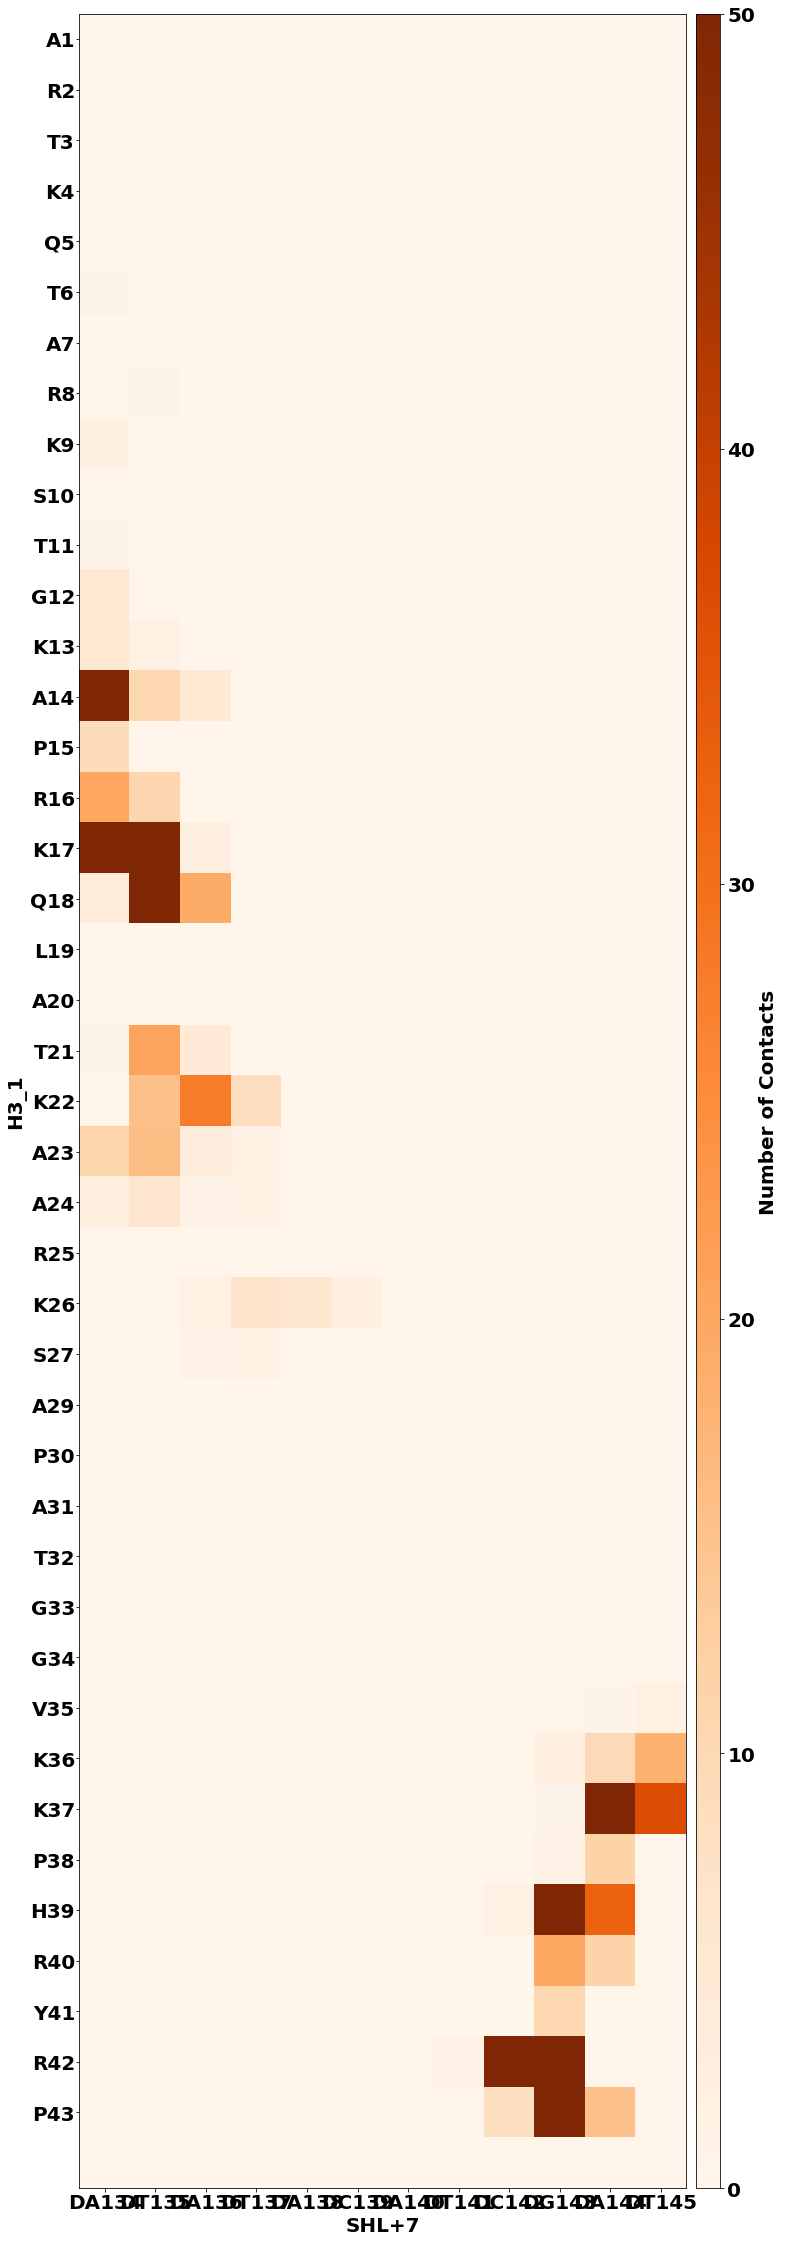

In [23]:
SHL7 = ['DA134', 'DT135', 'DA136', 'DT137', 'DA138', 'DC139', 'DA140', 'DT141', 'DC142', 'DG143', 'DA144', 'DT145']
H3_1 = ['A1', 'R2', 'T3', 'K4', 'Q5', 'T6', 'A7', 'R8', 'K9', 'S10', 'T11', 'G12', 'K13', 
       'A14', 'P15', 'R16', 'K17', 'Q18', 'L19', 'A20', 'T21', 'K22', 'A23', 'A24', 'R25', 
       'K26', 'S27', 'A29', 'P30', 'A31', 'T32', 'G33', 'G34', 'V35', 'K36', 'K37', 'P38', 'H39',
       'R40', 'Y41', 'R42', 'P43']
fig2, ax2 = plt.subplots(figsize=(18, 40))
im = ax2.imshow(average_contacts, origin='upper', cmap='Oranges', vmin=0, vmax=50)

tick_interval = 1
a = len(H3_1)
b = len(SHL7)
ax2.set_yticks(np.arange(a)[::tick_interval])
ax2.set_xticks(np.arange(b)[::tick_interval])
ax2.set_yticklabels(H3_1)
ax2.set_xticklabels(SHL7)

plt.ylabel("H3_1", fontsize=20.0, fontweight="bold")
plt.xlabel("SHL+7", fontsize=20.0, fontweight="bold")

cbar2 = fig2.colorbar(im, pad=0.01, aspect=90)
cbar2.ax.set_ylabel('Number of Contacts', fontsize=20.0)
cbar2.ax.tick_params(labelsize=20)

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.tick_params(labelsize=20, pad=1)

plt.savefig('WT_H3_1_contactmap_shl7_1.svg', format="svg", transparent=True, dpi=600)
plt.show()

In [24]:

top = '/media/rutika/My_Book/hpc/arrow/h2a_3lz0/dry_h2a_3lz0.prmtop'
traj = '/media/rutika/My_Book/hpc/arrow/h2a_3lz0/dry_t_fit.xtc'
u = mda.Universe(top, traj)
residues_set3 = u.select_atoms("resid 291-333")
residues_set4 = u.select_atoms("resid 146-157")
cutoff_distance = 5.0  

all_contacts = []

for ts in u.trajectory:
    contacts = np.zeros((len(residues_set3.residues), len(residues_set4.residues)))
    for i, res3 in enumerate(residues_set3.residues):
        for j, res4 in enumerate(residues_set4.residues):
            distances = mda.lib.distances.distance_array(res3.atoms.positions, res4.atoms.positions)
            contacts[i, j] = np.sum(distances < cutoff_distance)

    all_contacts.append(contacts)

average_contacts = np.mean(all_contacts, axis=0)

contact_data = pd.DataFrame(average_contacts, 
                            index=[res3.resid for res1 in residues_set3.residues],
                            columns=[res4.resid for res2 in residues_set4.residues])

contact_data.to_csv("contact_wt_shl7_H3_11.csv")


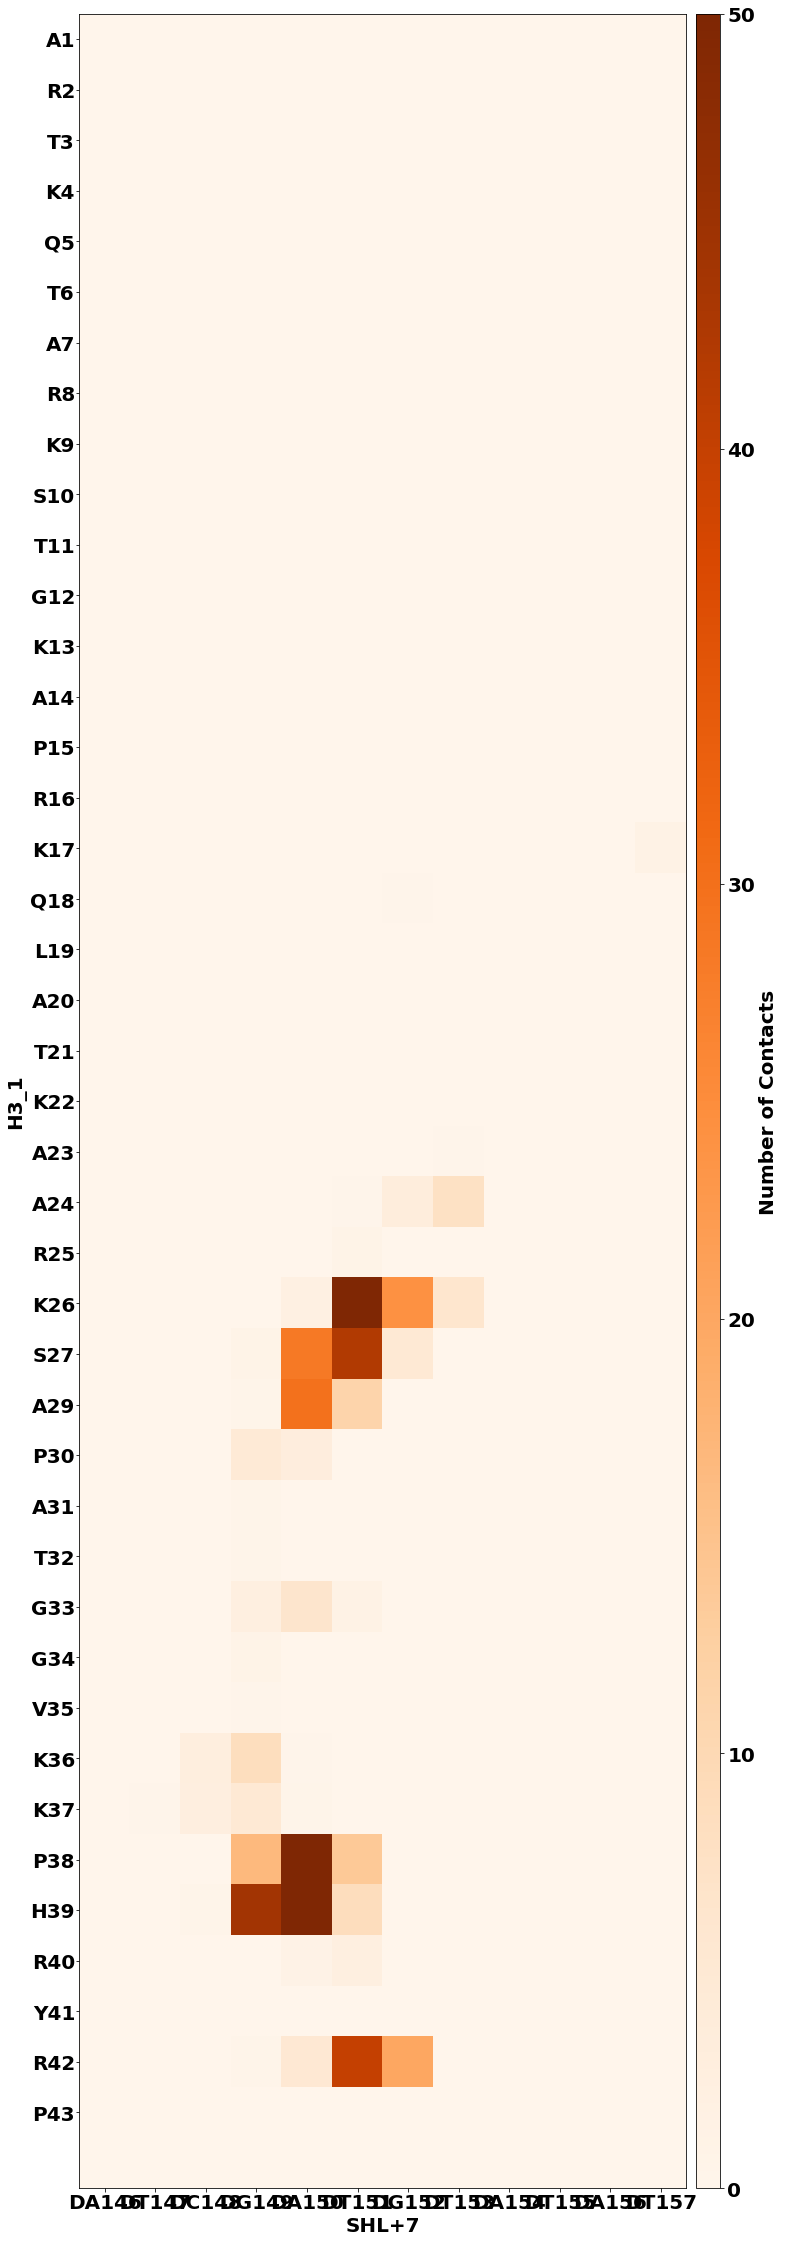

In [25]:
SHL_7 = ['DA146', 'DT147', 'DC148', 'DG149', 'DA150', 'DT151', 'DG152', 'DT153', 'DA154', 'DT155', 'DA156', 'DT157']
H3_11 = ['A1', 'R2', 'T3', 'K4', 'Q5', 'T6', 'A7', 'R8', 'K9', 'S10', 'T11', 'G12', 'K13', 
       'A14', 'P15', 'R16', 'K17', 'Q18', 'L19', 'A20', 'T21', 'K22', 'A23', 'A24', 'R25', 
       'K26', 'S27', 'A29', 'P30', 'A31', 'T32', 'G33', 'G34', 'V35', 'K36', 'K37', 'P38', 'H39',
       'R40', 'Y41', 'R42', 'P43']
fig2, ax2 = plt.subplots(figsize=(18, 40))
im = ax2.imshow(average_contacts, origin='upper', cmap='Oranges', vmin=0, vmax=50)
tick_interval = 1
a = len(H3_11)
b = len(SHL_7)
ax2.set_yticks(np.arange(a)[::tick_interval])
ax2.set_xticks(np.arange(b)[::tick_interval])
ax2.set_yticklabels(H3_11)
ax2.set_xticklabels(SHL_7)
plt.ylabel("H3_1", fontsize=20.0, fontweight="bold")
plt.xlabel("SHL+7", fontsize=20.0, fontweight="bold")
cbar2 = fig2.colorbar(im, pad=0.01, aspect=90)
cbar2.ax.set_ylabel('Number of Contacts', fontsize=20.0)
cbar2.ax.tick_params(labelsize=20)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.tick_params(labelsize=20, pad=1)
plt.savefig('WT_H3_1_contactmap_shl7_11.svg', format="svg", transparent=True, dpi=600)
plt.show()